## <a id='top'></a>

# CSCI 3202, Fall 2020
# Assignment 3
# Due: Monday 16 November 2020 by 11:59 PM

<br> 

### Your name: Connor Ely

<br> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as integrate
import unittest
from math import floor, isclose
from scipy.optimize import minimize


## Problem 1:  EVIU and EVPI

Suppose we have an overwhelming sense of exam déjà vu, and we're going to catch the Buff Bus again.  We want to decide at what time $d$ to go wait for it.  We decide to use the the linear loss function 

$$L(d,x)=\begin{cases} 
	2(x-d) & x\geq d \\
	4(d-x) & x <d
    	\end{cases}$$.
        
As in the exam, we model the Buff Bus arrival times as an exponential random variable $X$ that arrives on average once per hour, so they have probability density function of $f(x)=e^{-x}$ for $x>0$ (note: this has mean of $E_X[x]=1$).

The result from the exam was that the *expected loss* of the decision $d$ was:
$$E_X[L(d,x)] = \int_0^d 4(d-x)e^{-x}\, dx + \int_d^\infty 2(x-d)e^{-x}\, dx$$

...we maybe tried to avoid doing that integral and reasoned through it, because often such an integral is messy and may require numerical methods.


### (1a)  A Loss function:

Create a `ExpectedLoss` object or function that takes as input 3 arguments: 
    - a decision $d$
    - a loss function $L(d,x)$
    - a probability density $f(x)$

and returns the value of $$E_X[L(d,x)]=\int_{-\infty}^\infty L(d,x) f(x) \, dx$$.

Inside your function, you can and should use the scipy.integrate function with documentation: 
https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html.



In [149]:
def ExpectedLoss(d, loss_function, prob_density):
    return integrate.quad(lambda x: loss_function(d, x)*prob_density(x), 0, d)[0] + integrate.quad(lambda x: loss_function(d, x)*prob_density(x), d, np.inf)[0]

## (1b) A quick check:
Double check that your integrate code is working well on the infinite support of the exponential random variable.  Check that you in fact get $$E[X]=\int_0^\infty e^{-x} \, dx=1$$ from your usage of `integrate` above.

In [150]:
f= lambda x:np.exp(-x)
L = lambda d, x:1
print("Integral evaluates to:", ExpectedLoss(np.inf, L, f))

Integral evaluates to: 1.0000000000000002


## (1c) Scoring Decisions:
Our goal is typically to compare the losses of 3 decision types:
 - the decision made "ignoring uncertainty," using $d=E[X]$
 - the decision made with "perfect information", using $d=x$
 - the decision made with uncertainty to minimize loss, the Bayes' decision.
 
1. Use your function in (1a) to compute the expected loss when ignoring uncertainty.

2. Use your function in (1a) or reason to compute the expected loss with perfect information.

3. Use your function in (1a) to *plot* the expected loss for a fine grid (`linspace`) of $d$ values from 0 to 10.  Given this plot, visually estimate the optimal decision $d$ and it's expected loss.

Expected loss ignoring uncertainty: 2.207276647028654
Expected loss with perfect information is zero. All we have to do here is look at the loss function to calculate this when x = d. We don't need to integrate.


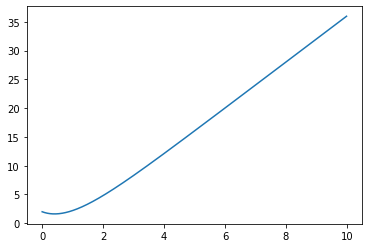

In [152]:
def loss_function(d, x):
    if x >= d:
        return 2*(x - d)
    else:
        return 4*(d - x)
f= lambda x:np.exp(-x)
print("Expected loss ignoring uncertainty:", ExpectedLoss(1, loss_function, f))
print("Expected loss with perfect information is zero. All we have to do here is look at the loss function to calculate this when x = d. We don't need to integrate.")
x = np.arange(0,10,0.01)
d_values = []
for i in range(len(x)):
    d_values.append(ExpectedLoss(x[i], loss_function, f))
plt.plot(x, d_values)

The optimal decision $d$ seems to be around 0.5 with an expected loss of around 2.

## (1d) Optimizing Decisions:
Since the Bayes' decision should be the minimum of the function in (1a), we can use another numeric method in Python to find it exactly!  Check out `scipy.optimize` https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html and use it to find the Bayes' decision.

For convenience, you may restructure your code in (1a) to get the loss function while only $d$ as taken as an input.

In [156]:
outputVariable = minimize(fun = lambda d: ExpectedLoss(d, loss_function, f), x0 = 1.6)
print(outputVariable)
print("The Bayes' decision is printed as 'fun' in the above table")

      fun: 1.6218604324327122
 hess_inv: array([[0.24954617]])
      jac: array([-6.40749931e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([0.40546494])
The Bayes' decision is printed as 'fun' in the above table


## (1e) Bigger Losses
$$L_l(d,x)=\begin{cases} 
	20(d-x) & x \leq d \\
	200+20(d-x) & x> d \\		
	\end{cases}$$.
    
Consider instead the loss function above, which contains a large jump at $x=d$.  Use your `ExpectedLoss` and/or `optimize` routines to find the Bayes' decision for the bus-waiting problem in this case, where a large amount of utility is lost as soon as $x>d$ (or we miss the bus).  Does your result here seem intuitive, given the Bayes' decision in parts (1c/1d)?

In [158]:
def nonnegative_loss_function(d, x): #modified loss function, also does not allow for negative loss when x>>>>>d
    if x <= d:
        if 20*(d-x) > 0:
            return 20*(d - x)
        else:
            return 0
    else:
        if 200 + 20*(d-x) > 0:
            return 200 + 20*(d - x)
        else:
            return 0
outputVariable2 = minimize(fun = lambda d: ExpectedLoss(d, nonnegative_loss_function, f), x0 = 1.6)
print(outputVariable2)
print("The Bayes' decision is printed as 'fun' in the above table")

      fun: 46.05179266170881
 hess_inv: array([[0.05002085]])
      jac: array([-4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([2.30258963])
The Bayes' decision is printed as 'fun' in the above table


Our Bayes' decision value of optimal loss comes out to be a value much higher than previously in part 1d. This makes sense intuitively since now we have much more incentive to arrive earlier since we incur a major loss if we miss the buss. This also means that we incur more loss even arriving at the optimal time since this is earlier than we would have arrived in part 1d.


## Problem 2:  Bayesian network to model heart disease

The following Bayesian network is based loosely on a study that examined heart disease risk factors in 167 elderly individuals in South Carolina.  Note that this figure uses Y and N to represent Yes and No, whereas in class we used the equivalent T and F to represent True and False Boolean values.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw05_bayesnet_heartdisease.png" style="width: 650px;"/>

<a id='p1a'></a>

### (2a) 

Create a `BayesNet` object to model this.  Below are the codes for the (conditional) probability `P` function and `BayesNode` class as well, that we used in class on Monday (9 March) to represent the variable nodes and calculate probabilities. You can code this however you want, subject to the following constraints:
1. the nodes are represented using the `BayesNode` class and can work with the `P` function for probabilities,
1. your `BayesNet` structure keeps track of which nodes are in the Bayes net, as well as
1. which nodes are the parents/children of which other nodes.

Some *suggested* skeleton codes for a class structure are given. You are free and encouraged to use the code from our in-class notebooks on Bayes Nets and Markov Models. The point of this exercise is to make sure you understand the example from class. The suggestions for methods to implement are in view of the fact that we will need to calculate some probabilities, which is going to require us to `find_node`s and `find_values` that nodes can take on.

In [2]:
## For the sake of brevity...
T, F = True, False

## From class:
def P(var, value, evidence={}):
    '''The probability distribution for P(var | evidence), 
    when all parent variables are known (in evidence)'''
    if len(var.parents)==1:
        # only one parent
        row = evidence[var.parents[0]]
    else:
        # multiple parents
        row = tuple(evidence[parent] for parent in var.parents)
    return var.cpt[row] if value else 1-var.cpt[row]

## Also from class:
class BayesNode:
    
    def __init__(self, name, parents, values, cpt):
        if isinstance(parents, str):
            parents = parents.split()
            
        if len(parents)==0:
            # if no parents, empty dict key for cpt
            cpt = {(): cpt}
        elif isinstance(cpt, dict):
            # if there is only one parent, only one tuple argument
            if cpt and isinstance(list(cpt.keys())[0], bool):
                cpt = {(v): p for v, p in cpt.items()}

        self.variable = name
        self.parents = parents
        self.cpt = cpt
        self.values = values
        self.children = []
        
    def __repr__(self):
        return repr((self.variable, ' '.join(self.parents)))    

    
##===============================================##
## Suggested codes for a BayesNet class ##
##===============================================##

class BayesNet:
    '''Bayesian network containing only boolean-variable nodes.'''

    def __init__(self, node_specs=[]):
        '''Initialize the Bayes net by adding each of the nodes,
        which should be a list BayesNode class objects ordered
        from parents to children (`top` to `bottom`, from causes
        to effects)'''
        self.nodes = []
        self.variables = []
        for node_spec in node_specs:
            self.add(*node_spec)
                
    def add(self, name, parents, values, cpt):
        '''Add a new BayesNode to the BayesNet. The parents should all
        already be in the net, and the variable itself should not be'''
        node = BayesNode(name=name, parents=parents, values=values, cpt=cpt)
        assert node.variable not in self.variables
        assert all((parent in self.variables) for parent in node.parents)
        self.nodes.append(node)
        self.variables.append(node.variable)
        for parent in node.parents:
            self.find_node(parent).children.append(node)

    def find_node(self, var):
        '''Find and return the BayesNode in the net with name `var`'''
        for n in self.nodes:
            if n.variable == var:
                return n
        raise Exception("No such variable: {}".format(var))

    def find_values(self, var):
        '''Return the set of possible values for variable `var`'''
        varnode = self.find_node(var)
        return varnode.values
        
    def __repr__(self):
        return 'BayesNet({})'.format(self.nodes)
    

In [25]:
# Create a Bayes net with those nodes and connections
heartDiseaseNet = BayesNet([
    ('SmokingAndAlcohol', '', [T,F], 0.2),
    ('ModerateExercise', '', [T,F], 0.5),
    ('HighBloodPressure', ['SmokingAndAlcohol', 'ModerateExercise'], [T,F], {(T, T): 0.6, (T, F): 0.72, (F, T): 0.33, (F, F): 0.51}),
    ('Atherosclerosis', '', [T,F], 0.53),
    ('FamilyHistory', '', [T,F], 0.15),
    ('HeartDisease', ['Atherosclerosis', 'HighBloodPressure', 'FamilyHistory'], [T,F], {(T, T, T): 0.92, (T, T, F): 0.91, (T, F, T): 0.81, (T, F, F): 0.77, (F, T, T): 0.75, (F, T, F): 0.69, (F, F, T): 0.38, (F, F, F): 0.23}),
    ('AnginaPectoris', 'HeartDisease', [T,F], {T: 0.85, F: 0.40}),
    ('RapidHeartbeats', 'HeartDisease', [T,F], {T: 0.99, F: 0.30})
])

In [3]:
examNet = BayesNet([
    ('A', '', [T,F], 0.3),
    ('B', '', [T,F], 0.6),
    ('C', 'A', [T,F], {T: 0.6, F: 0.30}),
    ('D', ['A', 'B'], [T,F], {(T, T): 0.4, (T, F): 0.5, (F, T): 0.1, (F, F): 0.2}),
    ('E', ['B', 'D'], [T,F], {(T, T): 0.2, (T, F): 0.3, (F, T): 0.5, (F, F): 0.9})
])

In [8]:
ex = get_prob(X='A', e={'B': T, 'C': T, 'D':T, 'E':T}, bn=examNet)
print(ex.prob)
ex1 = get_prob(X='C', e={'D':T}, bn=examNet)
print(ex1.prob)

{True: 0.7741935483870968, False: 0.22580645161290325}
{True: 0.4721739130434783, False: 0.5278260869565218}


In [26]:
class Tests_Problem2(unittest.TestCase):
    def setUp(self):
        self.p1 = BayesNode('p1', '', [T,F], 0.3)
        self.p2 = BayesNode('p2', '', [T,F], 0.6)
        self.c  = BayesNode('c', ['p1', 'p2'], [T,F], {(T,T):0.1, (T,F):0.2, (F,T):0.3, (F,F):0.4})
    def test_onenode(self):
        self.assertEqual(P(self.p1, T), 0.3)
    def test_twonode(self):
        self.assertEqual(P(self.c, F, {'p1':T, 'p2':F}), 0.8)

In [27]:
tests_to_run = unittest.TestSuite()
tests_to_run.addTest(Tests_Problem2("test_onenode"))
tests_to_run.addTest(Tests_Problem2("test_twonode"))
unittest.TextTestRunner().run(tests_to_run)

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>


### (2b)

Craft a function `get_prob(X, e, bn)` to return the **normalized** probability distribution of variable `X` in Bayes net `bn`, given the evidence `e`.  That is, return $P(X \mid e)$. The arguments are:
* `X` is some representation of the variable you are querying the probability distribution of. Either a string (the variable name from the `BayesNode` or a `BayesNode` object itself are good options.
* `e` is some representation of the evidence your probability is conditioned on. When given an empty argument (or `None`) for `e`, `get_prob` should return the marginal distribution $P(X)$.
* `bn` is your `BayesNet` object.

You may do this using the `enumeration` algorithm from class (pseudocode is in the book), or by brute force (i.e., use a few `for` loops). Either way, you should be using your `BayesNet` object to keep track of all the nodes and relationships between nodes so your `get_prob` function knows these things.

Suggest implementation is below, where we use the `PDF_discrete` class and its associated functions as we did in the Bayes Nets in class notebook.

In [4]:
# Solution:

class PDF_discrete:
    '''Define a discrete probability distribution function.'''

    def __init__(self, varname='?', freqs=None):
        '''Create a dictionary of values - frequency pairs,
        then normalize the distribution to sum to 1.'''
        self.prob = {}
        self.varname = varname
        self.values = []
        if freqs:
            for (v, p) in freqs.items():
                self[v] = p
        self.normalize()

    def __getitem__(self, value):
        '''Given a value, return P[value]'''
        try:
            return self.prob[value]
        except KeyError:
            return 0

    def __setitem__(self, value, p):
        '''Set P[value] = p, input argument if '''
        if value not in self.values:
            self.values.append(value)
        self.prob[value] = p

    def normalize(self):
        '''Normalize the probability distribution and return it.
        If the sum of PDF values is 0, then return a 0'''
        total = sum(self.prob.values())
        if not isclose(total, 1.0):
            for value in self.prob:
                self.prob[value] /= total
        return self
    
def extend(s, var, val):
    """Copy the substitution s and extend it by setting var to val; return copy."""
    s2 = s.copy()
    s2[var] = val
    return s2

def get_prob(X, e, bn):
    '''Return the conditional probability distribution of variable X
    given evidence e, from BayesNet bn. [Figure 14.9]'''
    Q = PDF_discrete(X)
    for xi in bn.find_values(X):
        Q[xi] = enumerate_all(bn.variables, extend(e, X, xi), bn)
    return Q.normalize()
    
def enumerate_all(variables, e, bn):
    '''Return the sum of those entries in P(variables | e{others})
    consistent with e, where P is the joint distribution represented
    by bn, and e{others} means e restricted to bn's other variables
    (the ones other than variables). Parents must precede children in variables.'''
    if not variables:
        return 1.0
    Y, rest = variables[0], variables[1:]
    Ynode = bn.find_node(Y)
    if Y in e:
        # Y in evidence, so we know its value and just multiply
        
        return P(Ynode, e[Y], e) * enumerate_all(rest, e, bn)
    else:
        # Y not in evidence so we have to sum (Law of Total Prob.)    
        return sum(P(Ynode, y, e) * enumerate_all(rest, extend(e, Y, y), bn)
                   for y in bn.find_values(Y))


### (2c)
Use your `get_prob` function to calculate the following probabilities. Print them to the screen and compare to the original Bayes net figure given to make sure the output passes these "unit tests".

1. The marginal probability of `Family History` is $P(FH=T)=0.15$
2. The probability of *not* experiencing `Angina Pectoris`, given `Heart Disease` is observed, is $P(Ang=F \mid HD=T)=1-0.85=0.15$
3. The probability of `High Blood Pressure`, given a person does `Smoke and/or use Alcohol` but does not get `Moderate Exercise`, is $P(HBP=T \mid Sm=T, ME=F)=0.72$
4. The probability of an arbitrary individual having Heart Disease,  $P(HD=T)$
5. The probability that an individual does not have Heart Disease, given that Rapid Heartbeat was observed,  
$P(HD=F∣Rapid=T)$
6. The probability that an individual is a `Smoker/Alcohol User` if they have `Heart Disease`, $P(Sm=T \mid HD=T)$
7. How would you expect the probability in 6. to change if you also know the individual has `High Blood Pressure`?  Verify your hypothesis by calculating the relevant probability.

In [47]:
p1 = get_prob(X='FamilyHistory', e={}, bn=heartDiseaseNet)
p2 = get_prob(X='AnginaPectoris', e={'HeartDisease': T}, bn=heartDiseaseNet)
p3 = get_prob(X='HighBloodPressure', e={'SmokingAndAlcohol': T, 'ModerateExercise': F}, bn=heartDiseaseNet)
p4 = get_prob(X='HeartDisease', e={}, bn=heartDiseaseNet)
p5 = get_prob(X='HeartDisease', e={'RapidHeartbeat': T}, bn=heartDiseaseNet)
p6 = get_prob(X='SmokingAndAlcohol', e={'HeartDisease': T}, bn=heartDiseaseNet)
p7 = get_prob(X='SmokingAndAlcohol', e={'HeartDisease': T, 'HighBloodPressure': T}, bn=heartDiseaseNet)
print(p6.prob)
print(p7.prob)

{True: 0.2163440784303391, False: 0.7836559215696609}
{True: 0.28205128205128205, False: 0.717948717948718}


I would expect it to be more likely that the individual is a smoker or alcohol user if they also have high blood pressure along with heart disease. This hypothesis is confirmed above in the print statements.

### (2d)
Rather than exact calculations, we can also *simulate* on a Bayesian Network.  Simulate 10000 hypothetical elderly individuals from South Carolina on the given network.  Using logicals, compute the probabilities in numbers (6.) and (7.) of part (2c) and verify that they are approximately equivalent.

No API is required here, but your final result should print the empirical (simulated) probabilities next to the exact theoretical results for these two outcomes from (2c).

In [61]:
#Recommended simulation structure:
#Set up same BayesNodes or Conditional Probability Tables as in (2a)

#For 10000 samples...

    #Randomly sample variables from top-to-bottom on the network, where children probabilities depend on parent values

    #Save them all in one large Data frame or array
citizens = []
for i in range(10000):
    prob_smoker = get_prob(X='SmokingAndAlcohol', e={}, bn=heartDiseaseNet)
    smoker = np.random.choice([True, False], p = [prob_smoker.prob[1], prob_smoker.prob[0]])
    prob_exercise = get_prob(X='ModerateExercise', e={}, bn=heartDiseaseNet)
    exercise = np.random.choice([True, False], p = [prob_exercise.prob[1], prob_exercise.prob[0]])
    if smoker == True:
        if exercise == True:
            prob_high_BP = get_prob(X='HighBloodPressure', e={'SmokingAndAlcohol': T, 'ModerateExercise': T}, bn=heartDiseaseNet)
            high_BP = np.random.choice([True, False], p = [prob_high_BP.prob[1], prob_high_BP.prob[0]])
        else:
            prob_high_BP = get_prob(X='HighBloodPressure', e={'SmokingAndAlcohol': T, 'ModerateExercise': F}, bn=heartDiseaseNet)
            high_BP = np.random.choice([True, False], p = [prob_high_BP.prob[1], prob_high_BP.prob[0]])
    else:
        if exercise == True:
            prob_high_BP = get_prob(X='HighBloodPressure', e={'SmokingAndAlcohol': F, 'ModerateExercise': T}, bn=heartDiseaseNet)
            high_BP = np.random.choice([True, False], p = [prob_high_BP.prob[1], prob_high_BP.prob[0]])
        else:
            prob_high_BP = get_prob(X='HighBloodPressure', e={'SmokingAndAlcohol': F, 'ModerateExercise': F}, bn=heartDiseaseNet)
            high_BP = np.random.choice([True, False], p = [prob_high_BP.prob[1], prob_high_BP.prob[0]])
    prob_atherosclerosis = get_prob(X='Atherosclerosis', e={}, bn=heartDiseaseNet)
    atherosclerosis = np.random.choice([True, False], p = [prob_atherosclerosis.prob[1], prob_atherosclerosis.prob[0]])
    prob_FH = get_prob(X='FamilyHistory', e={}, bn=heartDiseaseNet)
    FH = np.random.choice([True, False], p = [prob_FH.prob[1], prob_FH.prob[0]])
    if atherosclerosis == True:
        if high_BP == True:
            if FH == True:
                prob_HD = get_prob(X='HeartDisease', e={'Atherosclerosis': T, 'HighBloodPressure': T, 'FamilyHistory': T}, bn=heartDiseaseNet)
                HD = np.random.choice([True, False], p = [prob_HD.prob[1], prob_HD.prob[0]])
            else:
                prob_HD = get_prob(X='HeartDisease', e={'Atherosclerosis': T, 'HighBloodPressure': T, 'FamilyHistory': F}, bn=heartDiseaseNet)
                HD = np.random.choice([True, False], p = [prob_HD.prob[1], prob_HD.prob[0]])
        else:
            if FH == True:
                prob_HD = get_prob(X='HeartDisease', e={'Atherosclerosis': T, 'HighBloodPressure': F, 'FamilyHistory': T}, bn=heartDiseaseNet)
                HD = np.random.choice([True, False], p = [prob_HD.prob[1], prob_HD.prob[0]])
            else:
                prob_HD = get_prob(X='HeartDisease', e={'Atherosclerosis': T, 'HighBloodPressure': F, 'FamilyHistory': F}, bn=heartDiseaseNet)
                HD = np.random.choice([True, False], p = [prob_HD.prob[1], prob_HD.prob[0]])
    elif atherosclerosis == False:
        if high_BP == True:
            if FH == True:
                prob_HD = get_prob(X='HeartDisease', e={'Atherosclerosis': F, 'HighBloodPressure': T, 'FamilyHistory': T}, bn=heartDiseaseNet)
                HD = np.random.choice([True, False], p = [prob_HD.prob[1], prob_HD.prob[0]])
            else:
                prob_HD = get_prob(X='HeartDisease', e={'Atherosclerosis': F, 'HighBloodPressure': T, 'FamilyHistory': F}, bn=heartDiseaseNet)
                HD = np.random.choice([True, False], p = [prob_HD.prob[1], prob_HD.prob[0]])
        else:
            if FH == True:
                prob_HD = get_prob(X='HeartDisease', e={'Atherosclerosis': F, 'HighBloodPressure': F, 'FamilyHistory': T}, bn=heartDiseaseNet)
                HD = np.random.choice([True, False], p = [prob_HD.prob[1], prob_HD.prob[0]])
            else:
                prob_HD = get_prob(X='HeartDisease', e={'Atherosclerosis': F, 'HighBloodPressure': F, 'FamilyHistory': F}, bn=heartDiseaseNet)
                HD = np.random.choice([True, False], p = [prob_HD.prob[1], prob_HD.prob[0]])
    if HD == True:
        prob_AP = get_prob(X='AnginaPectoris', e={'HeartDisease': T}, bn=heartDiseaseNet)
        AP = np.random.choice([True, False], p = [prob_AP.prob[1], prob_AP.prob[0]])
        prob_RH = get_prob(X='RapidHeartbeats', e={'HeartDisease': T}, bn=heartDiseaseNet)
        RH = np.random.choice([True, False], p = [prob_AP.prob[1], prob_AP.prob[0]])
    else:
        prob_AP = get_prob(X='AnginaPectoris', e={'HeartDisease': F}, bn=heartDiseaseNet)
        AP = np.random.choice([True, False], p = [prob_AP.prob[1], prob_AP.prob[0]])
        prob_RH = get_prob(X='RapidHeartbeats', e={'HeartDisease': F}, bn=heartDiseaseNet)
        RH = np.random.choice([True, False], p = [prob_AP.prob[1], prob_AP.prob[0]])
print(citizens[0])

[False, False, True, False, False, True, True, True]


In [66]:
HD_count = 0
SM_and_HD_count = 0
SM_HD_HBP_count = 0
HD_and_HBP_count = 0
for i in range(10000):
    if citizens[i][5] == True:
        HD_count += 1
        if citizens[i][0] == True:
            SM_and_HD_count += 1
            if citizens[i][2] == True:
                SM_HD_HBP_count += 1
        if citizens[i][2] == True:
            HD_and_HBP_count += 1
print("Simulated probabilities:", SM_and_HD_count/HD_count, SM_HD_HBP_count/HD_and_HBP_count)
print("Theorhetical results:", p6.prob, p7.prob)

Simulated probabilities: 0.2181187820319566 0.2854881266490765
Theorhetical results: {True: 0.2163440784303391, False: 0.7836559215696609} {True: 0.28205128205128205, False: 0.717948717948718}
